In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend

Using TensorFlow backend.
C:\Users\kplus\anaconda3\envs\myenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kplus\anaconda3\envs\myenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kplus\anaconda3\envs\myenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kplus\anaconda3\envs\myenv36\lib

In [2]:
# 定義訓練參數
batch_size = 256
epochs = 2

# 定義圖像寬、高
img_rows, img_cols = 28, 28

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_test_org = y_test 
# Input shape
# backend.image_data_format()
# If data_format='channels_last': 4D tensor with shape (batch_size, rows, cols, channels).
# If data_format='channels_first': 4D tensor with shape (batch_size, channels, rows, cols).
# channel:1 代表灰階
if backend.image_data_format() == 'channels_last':
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
else : # channel_first
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)

In [4]:
# 正規化 0~255 → 0~1
X_train_nor = X_train.astype('float32') / 255
X_test_nor = X_test.astype('float32') / 255

# y 轉成 one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [5]:
model = Sequential()
# 卷積層
model.add(Conv2D( filters=32, kernel_size=(3, 3), activation='relu',
                input_shape=input_shape))

model.add(Conv2D( filters=64, kernel_size=(3, 3), activation='relu' ))

model.add(MaxPooling2D( pool_size=(2, 2) ))
# Dropout 防止過度擬合
model.add(Dropout(0.25))
# Flatten 攤平轉為1D準備接全連接層
model.add(Flatten())

model.add(Dense( 128, activation='relu' ))

model.add(Dropout(0.5))

model.add(Dense( 10, activation='softmax' ))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# train model
train_history = model.fit(X_train_nor, y_train, batch_size=batch_size, 
                         epochs=epochs, 
                         verbose=1,
                         validation_split=0.2)


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 119s 2ms/step - loss: 0.3657 - acc: 0.8852 - val_loss: 0.0771 - val_acc: 0.9775
Epoch 2/2
48000/48000 [==============================] - 115s 2ms/step - loss: 0.1084 - acc: 0.9681 - val_loss: 0.0494 - val_acc: 0.9854


In [9]:
score = model.evaluate(X_test_nor, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 8s 825us/step
Test loss: 0.04270046160526108
Test accuracy: 0.9858


In [10]:
# rows=true, cols=pred
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test_nor)
confusion_matrix = confusion_matrix(y_test_org, y_pred)
print(confusion_matrix)

[[ 973    0    1    0    0    1    2    1    2    0]
 [   0 1130    1    1    0    0    2    1    0    0]
 [   2    1 1016    2    3    0    0    6    2    0]
 [   2    0    1  997    0    5    0    2    2    1]
 [   1    0    2    0  972    0    1    0    1    5]
 [   2    0    0    4    0  882    2    1    1    0]
 [   5    2    0    0    1    4  946    0    0    0]
 [   1    2   11    2    0    0    0 1010    2    0]
 [   4    0    2    2    0    1    0    5  956    4]
 [   5    5    0    1    5    4    0    7    6  976]]


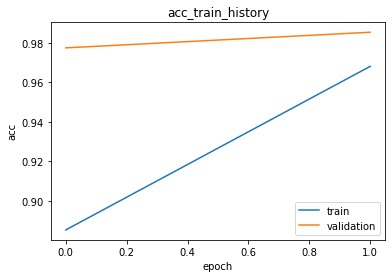

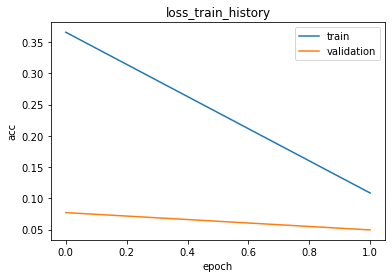

In [13]:
# 訓練過程趨勢圖
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation, title):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.legend(['train', 'validation'])
    plt.show()
# acc
show_train_history(train_history, 'acc', 'val_acc', 'acc_train_history')
# loss
show_train_history(train_history, 'loss', 'val_loss', 'loss_train_history')

In [14]:
model.save('cnn-model.h5')